In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/abs-spectra-v3/data_abs.csv', header=None)
ds

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,1,0,1,0,0,8,8,7,6,6,...,0,0,0,0,0,0,0,0,0,0
1,1,0,3,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
2,1,0,5,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,7,0,0,8,7,7,6,5,...,0,0,0,0,0,0,0,0,0,0
4,1,0,9,0,0,8,8,7,6,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230495,10,9,95,3,1,250,248,248,247,246,...,0,0,0,0,0,0,0,0,0,0
230496,10,9,95,5,1,252,253,253,253,253,...,0,0,0,0,0,0,0,0,0,0
230497,10,9,97,1,1,255,249,245,240,236,...,0,0,0,0,0,0,0,0,0,0
230498,10,9,97,3,1,254,253,252,252,250,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ds = ds[ds[4]==1] #select data for water media
ds = ds[ds[1]!=0] #core material not air
ds = ds.sample(frac=1).reset_index(drop=True)
ds

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,5,7,69,17,1,194,195,196,196,197,...,19,17,14,12,10,8,5,4,1,0
1,6,4,67,25,1,216,218,219,220,222,...,52,54,55,57,59,61,63,65,67,69
2,5,4,69,27,1,221,222,223,224,225,...,50,52,54,56,57,57,57,56,55,54
3,6,2,79,7,1,248,253,254,254,255,...,1,1,1,1,2,2,2,2,2,3
4,5,2,53,33,1,195,197,198,195,191,...,232,234,237,239,242,244,247,249,252,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114745,4,3,23,37,1,200,200,201,201,201,...,1,1,0,0,0,0,0,0,0,0
114746,8,6,33,27,1,145,148,150,152,155,...,14,12,10,8,7,5,4,2,1,0
114747,8,1,5,77,1,255,248,238,226,210,...,0,0,0,0,0,0,0,0,0,0
114748,10,4,33,39,1,217,217,218,219,220,...,5,4,4,3,2,2,1,1,0,0


In [ ]:
num_mats = 11
spectra = np.array(ds.iloc[:, 5:])/255

m1 = np.array(ds[[0]])
m2 = np.array(ds[[1]])
t1 = np.array(ds[[2]])/100
t2 = np.array(ds[[3]])/100

geo = np.hstack((m1, m2, t1, t2))


test_split = int(0.95*ds.shape[0])



y_train = spectra[:test_split]
y_train = tf.expand_dims(y_train, axis=-1)

x_train_m1 = keras.utils.to_categorical(m1[:test_split])
x_train_m1 = tf.expand_dims(x_train_m1, axis=1)

x_train_m2 = keras.utils.to_categorical(m2[:test_split])
x_train_m2 = tf.expand_dims(x_train_m2, axis=1)

x_train_t1 = t1[:test_split]
x_train_t1 = tf.expand_dims(x_train_t1, axis=-1)
x_train_t2 = t2[:test_split]
x_train_t2 = tf.expand_dims(x_train_t2, axis=-1)

x_train = geo[:test_split]
x_train = tf.expand_dims(x_train, axis=-1)


y_test = spectra[test_split:]
y_test = tf.expand_dims(y_test, axis=-1)

x_test_m1 = keras.utils.to_categorical(m1[test_split:])
x_test_m1 = tf.expand_dims(x_test_m1, axis=1)
x_test_m2 = keras.utils.to_categorical(m2[test_split:])
x_test_m2 = tf.expand_dims(x_test_m2, axis=1)
x_test_t1 = t1[test_split:]
x_test_t1 = tf.expand_dims(x_test_t1, axis=-1)
x_test_t2 = t2[test_split:]
x_test_t2 = tf.expand_dims(x_test_t2, axis=-1)

x_test = geo[test_split:]
x_test = tf.expand_dims(x_test, axis=-1)

In [ ]:
x_test_m1

<tf.Tensor: shape=(5738, 1, 11), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.]]], dtype=float32)>

#   load pre-trained forward model and freeze weights
The forward model is pre-trained, we do not want it to be modified (further trained) in the inverse net training. If the forward model was subject to further training, the inputs would loose their meaning as design parameters.
We therefore need to set the forward model as not trainable. Note: If a full model is set to trainable = False, the model needs to be compiled, for it to have an effect. Setting the model to trainable = False after compilation, this does not have any effect. To avoid recompilation, every single layer can be set to trainable=False in a loop through the model layers, which works also on compiled models without re-compilation.

In [ ]:
model_path = '/content/drive/MyDrive/abs-spectra-v3/models/resnext_model/resnext_model.hd5'
#model_weights_path = '/content/drive/MyDrive/abs-spectra-v3/models/resnext_model/resnext_model_weights.hd5'



# load pretrained forward model
fwd_model = keras.models.load_model(model_path, compile=False)


#fwd_model.load_weights(model_weights_path)

fwd_model.trainable = False


# Inverse resnet model

In [ ]:
def residual_block(x_in, N_filter, kernel_size=3, strides=1,
                   conv_layer=keras.layers.Conv1D, alpha=0.3,
                   with_BN=False):
    """resnet block, default: 1D convolutions"""

    # residual connection
    if x_in.shape[-1] != N_filter or strides != 1:
        # if input!=output dimension: add BN/ReLU/conv. into shortcut
        conv_shortcut = conv_layer(
            filters=N_filter, kernel_size=1, strides=strides, padding='same')(x_in)
    else:
        # if input==output dimension: use bare input as shortcut
        conv_shortcut = x_in

    # convolutional path
    x = x_in

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=kernel_size,
                   strides=strides, padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha)(x)

    x = conv_layer(filters=N_filter, kernel_size=1, strides=1,
                   padding='same', use_bias=not with_BN)(x)
    if with_BN:
        x = keras.layers.BatchNormalization()(x)

    # add residual and main and apply a further activation
    x = keras.layers.Add()([x, conv_shortcut])
    x = keras.layers.LeakyReLU(alpha)(x)

    return x

In [ ]:
def resblock_sequence_down(x_in, N_filter, N_blocks):
    x = x_in
    for i in range(N_blocks):
        x = residual_block(x, N_filter, kernel_size=3, strides=1, with_BN=True)
    # down: use strides=2 for downsampling (more flexible, since trainable).
    x = residual_block(x, N_filter, kernel_size=3, strides=2)
    return x


def resblock_sequence_up(x_in, N_filter, N_blocks):
    x = x_in
    for i in range(N_blocks):
        x = residual_block(x, N_filter, kernel_size=3, strides=1, with_BN=True)
    # up: use upsampling (more robust than transpose convolutions with stride 2)
    x = keras.layers.UpSampling1D()(x)
    return x


def resblock_sequence_id(x_in, N_filter, N_blocks):
    # identity block sequence: input shape = output shape
    x = x_in
    for i in range(N_blocks):
        x = residual_block(x, N_filter, kernel_size=3, strides=1, with_BN=True)
    return x

In [ ]:
keras.backend.clear_session()
N_blocks = 3    # Nr of resblocks between upsamplings


# spectrum in
target_spec_input = keras.layers.Input(shape=y_train.shape[1:])
x = target_spec_input

for i in range(N_blocks):
    x = residual_block(x, 32, kernel_size=3, strides=1)
# use strides=3 for downsampling. 200 --> 67
x = residual_block(x, 32, kernel_size=3, strides=3)

for i in range(N_blocks):
    x = residual_block(x, 64, kernel_size=3, strides=1)
x = residual_block(x, 64, kernel_size=3, strides=2)   # 67 --> 34

for i in range(N_blocks):
    x = residual_block(x, 128, kernel_size=3, strides=1)
x = residual_block(x, 128, kernel_size=3, strides=2)  # 34 --> 12

# x = keras.layers.Conv1D(filters=2, kernel_size=1, padding='same')(x)


x = keras.layers.Flatten()(x)


x_m1 = keras.layers.Dense(256, activation='relu')(x)
x_m1 = keras.layers.Dense(256, activation='relu')(x_m1)
out_design_m1 = keras.layers.Dense(num_mats, activation='softmax', name='design_out_m1')(x_m1)

x_m2 = keras.layers.Dense(256, activation='relu')(x)
x_m2 = keras.layers.Dense(256, activation='relu')(x_m2)
out_design_m2 = keras.layers.Dense(num_mats, activation='softmax', name='design_out_m2')(x_m2)

x_t1 = keras.layers.Dense(256, activation='relu')(x)
x_t1 = keras.layers.Dense(256, activation='relu')(x_t1)
out_design_t1 = keras.layers.Dense(1, activation='linear', name='design_out_t1')(x_t1)

x_t2 = keras.layers.Dense(256, activation='relu')(x)
x_t2 = keras.layers.Dense(256, activation='relu')(x_t2)
out_design_t2 = keras.layers.Dense(1, activation='linear', name='design_out_t2')(x_t2)



inverse_model = keras.Model(
    inputs = target_spec_input,
    outputs = [out_design_m1, out_design_m2, out_design_t1, out_design_t2], name='resnet_inverse_model')
inverse_model.summary()

Model: "resnet_inverse_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 200, 32)              64        ['input_1[0][0]']             
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 200, 32)              0         ['conv1d_1[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 200, 32)              3104      ['leaky_re_lu[0][0]']         
                                                                               

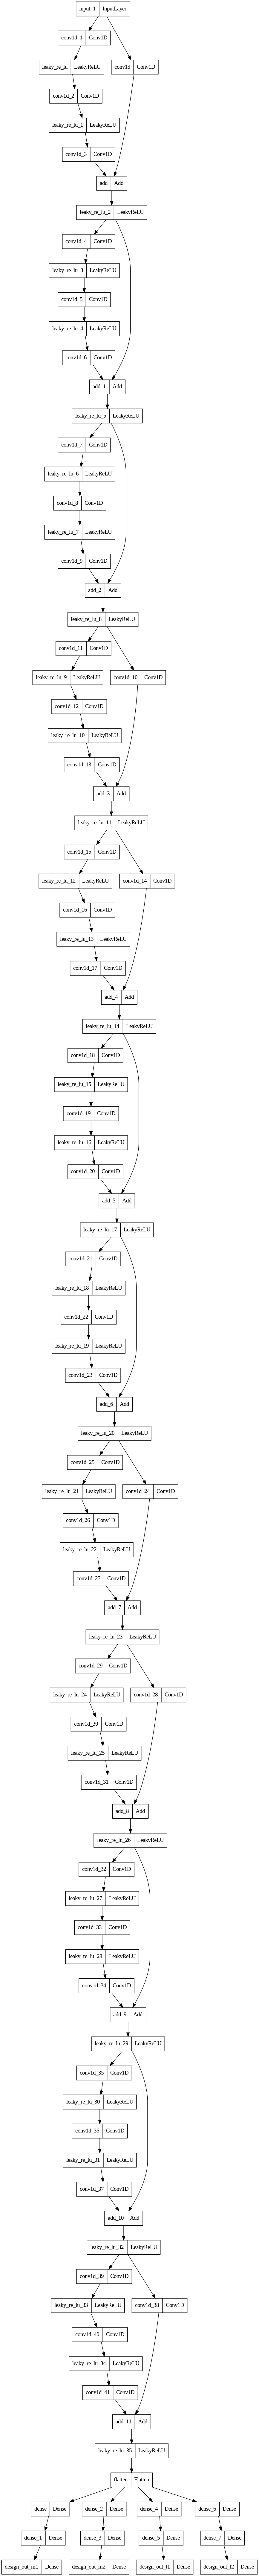

In [ ]:
from keras.utils import plot_model
plot_model(inverse_model)

# Define the full tandem model

In [ ]:
# inverse_model_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# get the inputs. alternatively we can re-use the layer as defined in the model above
tandem_input = inverse_model.inputs
inverse_output = inverse_model(tandem_input)

# design_pred_m1 = tf.expand_dims(inverse_output[0], axis=1)
# design_pred_m2 = tf.expand_dims(inverse_output[1], axis=1)
# design_pred_t1 = tf.expand_dims(inverse_output[2], axis=1)
# design_pred_t2 = tf.expand_dims(inverse_output[3], axis=1)

# tandem_output = fwd_model([design_pred_m1, design_pred_m2, design_pred_t1, design_pred_t2])

tandem_output = fwd_model([tf.expand_dims(inverse_output[0], axis=1),
                           tf.expand_dims(inverse_output[1], axis=1),
                           tf.expand_dims(inverse_output[2], axis=1),
                           tf.expand_dims(inverse_output[3], axis=1)])

tandem = keras.models.Model(inputs=tandem_input, outputs=tandem_output)

tandem.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 resnet_inverse_model (Func  [(None, 11),                 2952344   ['input_1[0][0]']             
 tional)                      (None, 11),                                                         
                              (None, 1),                                                          
                              (None, 1)]                                                          
                                                                                                  
 tf.expand_dims (TFOpLambda  (None, 1, 11)                0         ['resnet_inverse_model[0][

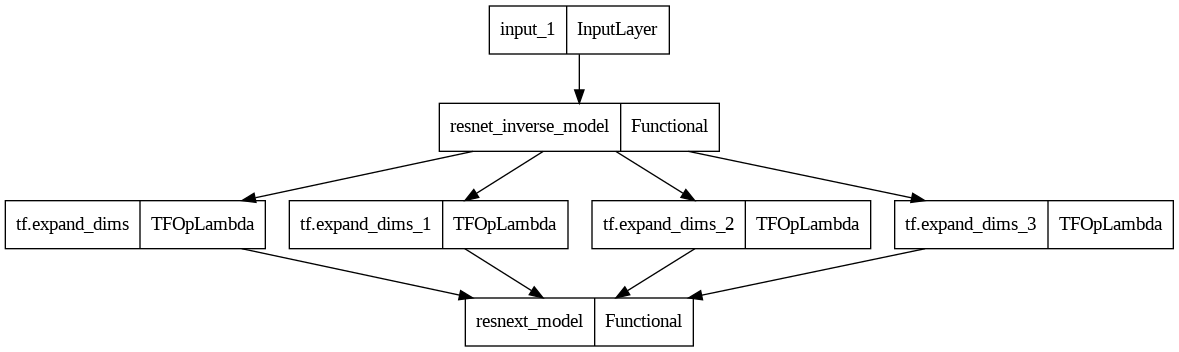

In [ ]:
from keras.utils import plot_model
plot_model(tandem)

# Tandem training
Now we compile the model with an optimizer (AdamW) we add callbacks and then run the training.
# Note on training data
The full tandem model takes as input the design target spectrum and returns the predicted spectrum of the suggested geometry. Therefore we do not use the geometries for training anymore, but we use the spectra for both, in- and output.

In [ ]:
# compile with optimizer and cost function
tandem.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001), loss='mse', metrics='mse')

## ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=1/3, patience=6, verbose=1)
# early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
# callback for checkpoint saving
checkpoint_save = ModelCheckpoint(filepath='checkpoints/tandem/',
                                  monitor='val_loss', save_weights_only=True, save_best_only=True)

callbacks = [reduce_lr, early_stop, checkpoint_save]


hist = None  # global history after BS incrase
for i in range(3):  # 3x16 epochs, doubling batchsize
    _h = tandem.fit(x=y_train, y=y_train,
                    validation_split=.2,
                    batch_size=32 * 2**i, epochs=16,
                    callbacks = callbacks)
    if hist is None:
        hist = _h
    else:
        for k in hist.history:
            hist.history[k] = np.concatenate([hist.history[k], _h.history[k]])

Epoch 1/16
2726/2726 [==============================] - 165s 49ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0073 - val_mse: 0.0073 - lr: 0.0010
Epoch 2/16
2726/2726 [==============================] - 122s 45ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0063 - val_mse: 0.0063 - lr: 0.0010
Epoch 3/16
2726/2726 [==============================] - 121s 44ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0063 - val_mse: 0.0063 - lr: 0.0010
Epoch 4/16
2726/2726 [==============================] - 125s 46ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0059 - val_mse: 0.0059 - lr: 0.0010
Epoch 5/16
2726/2726 [==============================] - 124s 46ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0055 - val_mse: 0.0055 - lr: 0.0010
Epoch 6/16
2726/2726 [==============================] - 125s 46ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0054 - val_mse: 0.0054 - lr: 0.0010
Epoch 7/16
2726/2726 [==============================] - 123s 45ms/step - loss: 0.0056 - mse: 0.0056 

# plot loss

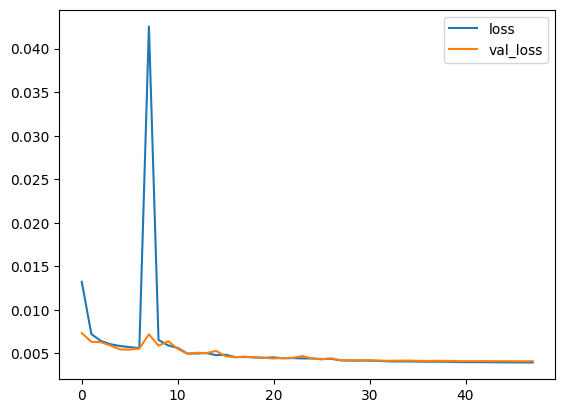

In [ ]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
tandem.save('/content/drive/MyDrive/abs-spectra-v3/models/tandem_model.hd5')
inverse_model.save('/content/drive/MyDrive/abs-spectra-v3/models/inversenet_tandem_generator.hd5')

In [ ]:
loaded_inv_model = keras.models.load_model('/content/drive/MyDrive/abs-spectra-v3/models/inversenet_tandem_generator.hd5')
loaded_inv_model.compile( optimizer= keras.optimizers.AdamW(learning_rate=0.001),
                          loss=
                          {'design_out_m1': 'categorical_crossentropy',
                          'design_out_m2': 'categorical_crossentropy',
                          'design_out_t1': 'mse',
                          'design_out_t2': 'mse'},
                          metrics=
                          {'design_out_m1': 'accuracy',
                          'design_out_m2': 'accuracy',
                          'design_out_t1': 'mse',
                          'design_out_t2': 'mse',}
                        )

# Validation using forward model

1/1 [==============================] - 0s 37ms/step
Input sample: m_1, m_2, t_1, t_2
 [[ 7.  ]
 [10.  ]
 [ 0.81]
 [ 0.17]]


Predicted:
m1, m2
t1, t2
7 , 2
[0.78127694] [-8.01686e-05]
1/1 [==============================] - 0s 42ms/step


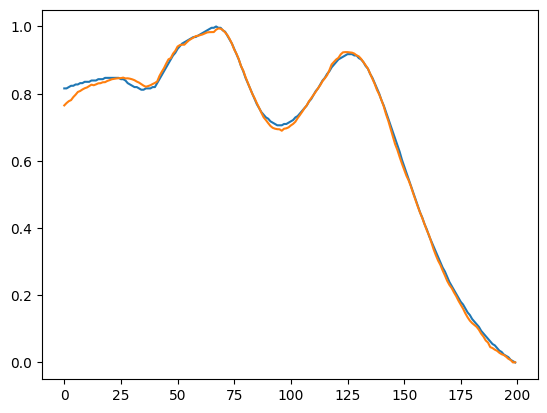

In [ ]:
# sample i from test
i = 798


[x_temp, y_temp] = [x_test[i], y_test[i]]

y_in = np.array([y_temp])

y_in.shape

[m1_p, m2_p, t1_p, t2_p] = loaded_inv_model.predict([y_in])

print('Input sample: m_1, m_2, t_1, t_2\n', np.array(x_temp))

print('\n\nPredicted:')
print('m1, m2')
print('t1, t2')
print(np.argmax(m1_p[0, :]), ',', np.argmax(m2_p[0, :]))
print(t1_p[0, :], t2_p[0, :])


plt.plot(y_test[i])
pred_spectra = fwd_model.predict([tf.expand_dims(m1_p, axis = 1),
                                 tf.expand_dims(m2_p, axis = 1),
                                 t1_p,
                                 t2_p])
plt.plot(pred_spectra[0])